<a href="https://colab.research.google.com/github/katgoodman/kat/blob/main/seaborn_and_pandas_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

#it is set to ignore warning
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load in database

In [ ]:
# Load in our data
from getpass import getpass

postgres_user = 'dabc_student'
postgres_pw = getpass()
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(  
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_table('houseprices',con=engine)
engine.dispose()

houseprices_df.info()

··········
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 1

# 1: Illustrate the distribution of *saleprice*

In [ ]:
houseprices_df[['saleprice']].describe()

,saleprice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


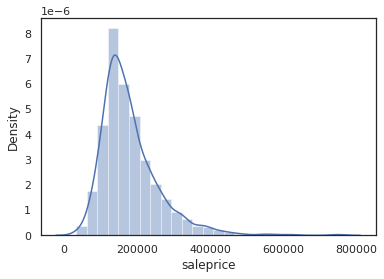

In [ ]:
sns.distplot(houseprices_df['saleprice'], bins=25)

#2: Illustrate the distribution of the *lotarea*

In [ ]:
houseprices_df[['lotarea']].describe()

,lotarea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


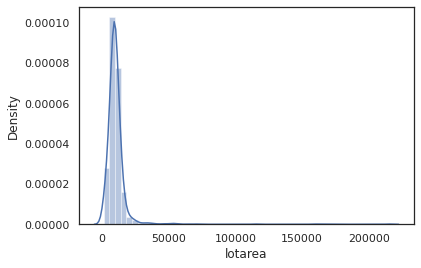

In [ ]:
sns.distplot(houseprices_df['lotarea'], bins=50)

#3: Use a box plot to illustrate how *overallcond* affects the *saleprice*

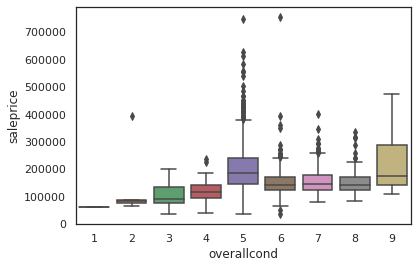

In [ ]:
sns.boxplot(x = houseprices_df["overallcond"], y = houseprices_df["saleprice"])

#4 On the same box plot, highlight the difference between having central air and not having it

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

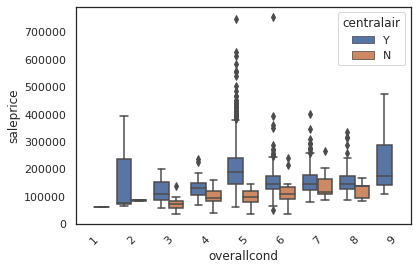

In [ ]:
ax = sns.boxplot(y="saleprice", hue="centralair", x = "overallcond", data=houseprices_df)

# like rotating the labels so we can read them
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

#the black dots are outliers

#5: Is there a correlcation between *lotarea* and *saleprice*?

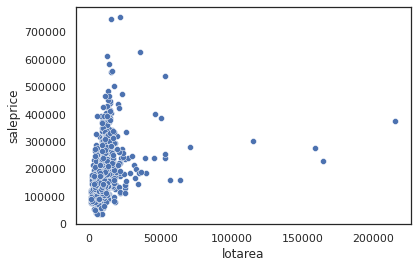

In [ ]:
sns.scatterplot(x = houseprices_df["lotarea"], y = houseprices_df["saleprice"])
# there is no correlation between the 2